In [44]:
%run ../replication_ori_functions.ipynb

Move disk 1 from peg 1 to peg 3
Move disk 2 from peg 1 to peg 2
Move disk 1 from peg 3 to peg 2
Move disk 3 from peg 1 to peg 3
Move disk 1 from peg 2 to peg 1
Move disk 2 from peg 2 to peg 3
Move disk 1 from peg 1 to peg 3
['CTC', 'GTC', 'TTC', 'AAC', 'ACC', 'AGC', 'ATA', 'ATG', 'ATT']


**Counting the number of times a kmer appears in a DNA string**

In [4]:
with open("PatternCount.txt", "r") as text_pattern_file:
    lines = text_pattern_file.readlines()
    text = lines[0].strip()
    pattern = lines[1].strip()

PatternCount(text, pattern)

24

**The most frequent kmer of certain length in a DNA string**

In [5]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FrequentWords(text, kmer)

The k-mer(s) of length 12 with maximum frequency 8 are:
TAGACCATAATG
AGACCATAATGA
GACCATAATGAC
ACCATAATGACG
CCATAATGACGG
CATAATGACGGC
ATAATGACGGCT


**An algorithm for finding the most frequent kmer of certain length that is faster than FrequentWords would be to create a lexicographically sorted dictionary of kmers of the specified length along with their index and populating the frequencies based on the kmer appearance in the string**

In [6]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FasterFrequentWords(text, kmer)

{'ACCATAATGACG',
 'AGACCATAATGA',
 'ATAATGACGGCT',
 'CATAATGACGGC',
 'CCATAATGACGG',
 'GACCATAATGAC',
 'TAGACCATAATG'}

**FrequentWords and FasterFrequentWords are fast for small k but it becomes impractical when the size of kmer is large. Therefore, a faster algorithm would be to identify identical k-mers that clump together in a sorted array**

In [7]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FindingFrequentWordsBySorting(text, kmer)

{'ACCATAATGACG',
 'AGACCATAATGA',
 'ATAATGACGGCT',
 'CATAATGACGGC',
 'CCATAATGACGG',
 'GACCATAATGAC',
 'TAGACCATAATG'}

**Finding the reverse complement of a DNA string**

In [8]:
with open("ReverseComplement.txt", "r") as text:
    string = text.read().strip()

rev_comp = ReverseComplement(string)

with open("ReverseComplement_output.txt", "w") as rev_comp_text:
    rev_comp_text.write(rev_comp)

**Identifying the starting positions where a Pattern appears as a substring of Genome**

In [9]:
with open("PatternMatching.txt", "r") as pat_genome:
    lines = pat_genome.readlines()
    pattern = lines[0].strip()
    genome = lines[1].strip()
            
result = PatternMatching(pattern, genome)

with open("PatternMatching_output.txt", "w") as out_file:
    out_file.write(" ".join(map(str, result)))

**Finding patterns forming clumps in a string**

In [10]:
with open("ClumpFinding.txt") as in_file:
    file_content =  in_file.readlines()
    Genome = file_content[0].strip()
    numbers = file_content[1].strip().split(" ")
    k = int(numbers[0].strip()) # Length of kmer
    L = int(numbers[1].strip()) # Window size
    t = int(numbers[2].strip()) # Minimum number of times that a kmer of length k must appear in a stretch of length L in the Genome

result = ClumpFinding(Genome, k, t, L)
print(" ".join(result))

AACGTCACAC TTTGAGTCAC ACGTCACACG TTTACGGGCA CGCCCCCCAC CTGTGTGGAG GTGGAAACGA GGCCTACACT


**A better algorithm to finding clumps by not calculating the frequency array for every window size**

In [11]:
with open("ClumpFinding.txt") as in_file:
    file_content =  in_file.readlines()
    Genome = file_content[0].strip()
    numbers = file_content[1].strip().split(" ")
    k = int(numbers[0].strip())
    L = int(numbers[1].strip())
    t = int(numbers[2].strip())

result = BetterClumpFinding(Genome, k, t, L)
print(" ".join(result))

AACGTCACAC TTTGAGTCAC ACGTCACACG TTTACGGGCA CGCCCCCCAC CTGTGTGGAG GTGGAAACGA GGCCTACACT


**Estimating the running time of the ClumpFinding problem**

In [12]:
import time

start_time = time.time()
result = ClumpFinding(Genome, k, t, L)
end_time = time.time()

print(f"Time taken by ClumpFinding function: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = BetterClumpFinding(Genome, k, t, L)
end_time = time.time()

print(f"Time taken by BetterClumpFinding function: {end_time - start_time:.4f} seconds")

Time taken by ClumpFinding function: 50.9055 seconds
Time taken by BetterClumpFinding function: 0.0648 seconds


**Finding kmers that form clumps for E-coli**

In [13]:
import time

ecoli_genome = open("E_coli_genome.txt").read()
k = 9
t = 3
L = 500

start_time = time.time()
result = BetterClumpFinding(ecoli_genome, k, t, L)
end_time = time.time()

print(f"Time taken to find kmers that form clumps in E-coli genome: {end_time - start_time:.4f} seconds")

with open("e_coli_kmer_clumps.txt", "w") as out_file:
    out_file.write("\n".join(result))

print(f"There are {len(result)} different 9-mers form (500,3)-clumps in the E. coli genome.")

Time taken to find kmers that form clumps in E-coli genome: 28.6591 seconds
There are 1904 different 9-mers form (500,3)-clumps in the E. coli genome.


**Finding positions in a genome where the skew diagram attains a minimum**

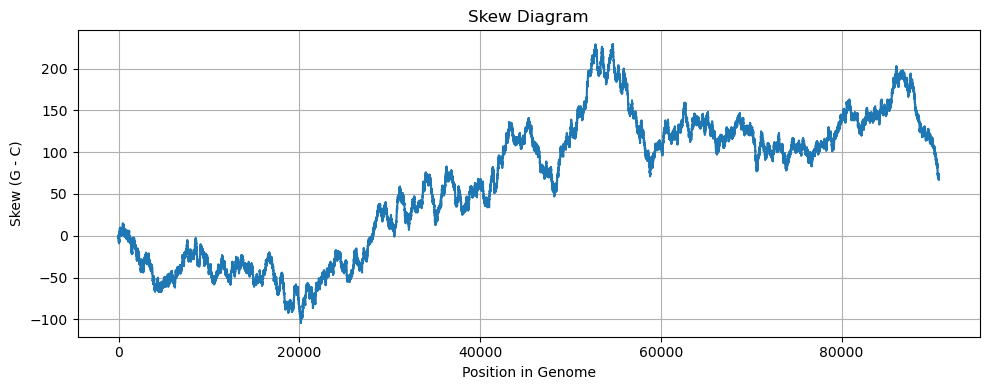

The positions in the genome at which the skew attains the minimum:
20175
20176
20179
20187


In [14]:
with open("MinimumSkewProblem.txt", 'r') as file:
        seq = file.read().strip()

min_positions = MinimumSkewProblem(seq, skew_output_file = "skew_values.txt")

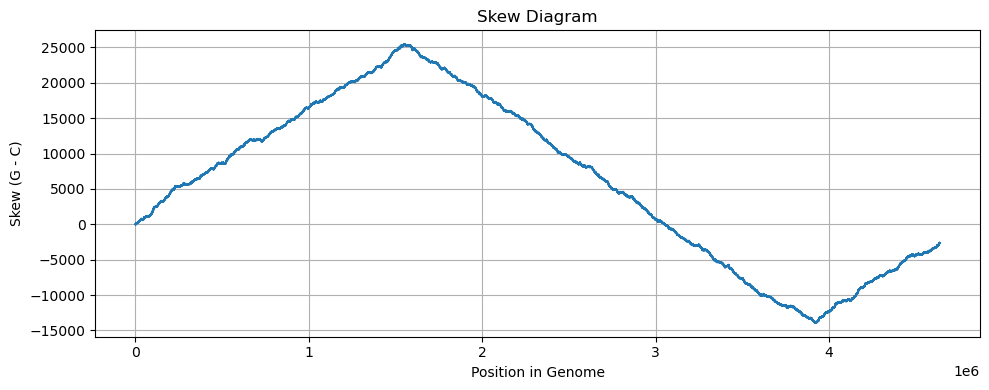

The positions in the genome at which the skew attains the minimum:
3923620
3923621
3923622
3923623


In [15]:
# Skew diagram for E-coli
with open("E_coli_genome.txt", 'r') as file:
    seq = file.read().strip()

min_positions = MinimumSkewProblem(seq, skew_output_file = "e_coli_skew_values.txt")

**Computing the number of mismatches between two string called the Hamming distance**

In [16]:
with open("HammingDistance_strings.txt") as f:
    strings = f.readlines()
    string1 = strings[0].strip()
    string2 = strings[1].strip()

result = HammingDistance(string1, string2)
print(f"The number of mismatches between two string is: {result}")

The number of mismatches between two string is: 846


**Finding all approximate occurrences of a pattern in a string**

In [37]:
with open("ApproximatePatMatch.txt") as f:
    all = f.readlines()
    Pattern = all[0].strip()
    Text = all[1].strip()
    d = int(all[2].strip())

result = ApproximatePatMatch(Text, Pattern, d)

with open("ApproximatePatMatch_starting_pos.txt", "w") as f:
    f.write(' '.join(map(str, result)))

Number of approximate pattern counts: 33


**Generating d-neigborhood of the Pattern i.e., the set of all k-mers whose Hamming distance from Pattern does not exceed d**

In [18]:
with open("Neighbors.txt") as f:
    all = f.readlines()
    Pattern = all[0].strip()
    d = int(all[1].strip())

with open("Neighbors_output.txt", "w") as f:
    f.write('\n'.join(Neighbors(Pattern, d)))

In [19]:
result = Neighbors("ATC", 2)
' '.join(result)

'CTT AGA GTA CCC CTC AAA ACA ATC GGC GTT GAC ATG ACC AGG AGT AGC GTC TTT TTA TGC CAC TTC TCC GCC ATA CGC AAT TAC TTG ATT AAC ACG ACT CTG CTA GTG AAG'

**Generating all k-mers of Hamming distance exactly d from Pattern**

In [20]:
result = ExactNeighbors("ATC", 2)
' '.join(result)

'AAT TTG TTT GTT AGG TTA ACG CTT ACT AGT AGA GTA AAA ACA CTG CTA GTG AAG'

**Building the d-neighborhood of a string iteratively instead of recursively**

In [21]:
result = IterativeNeighbors("ATC", 2)
' '.join(result)

'CTT GTA AGA CCC CTC AAA ACA ATC GTT GGC GAC ATG ACC AGG AGT AGC GTC TTT TTA TGC CAC TTC TCC ATA GCC CGC ATT AAT TTG TAC AAC ACG ACT CTG CTA GTG AAG'

**Finding the most frequent k-mers with up to d mismatches in Text**

In [22]:
with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FrequentWordsWithMismatches(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: GAAGAA


**A faster algorithm to find frequent words with mismatches by sorting**

In [23]:
with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FindingFrequentWordsWithMismatchesBySorting(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: GAAGAA


In [24]:
import time

with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

start_time = time.time()
result = FrequentWordsWithMismatches(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches without sorting: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = FindingFrequentWordsWithMismatchesBySorting(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches with sorting: {end_time - start_time:.4f} seconds")

Time taken to find most frequent kmers with up to d mismatches without sorting: 0.4615 seconds
Time taken to find most frequent kmers with up to d mismatches with sorting: 0.1141 seconds


**Finding the most frequent k-mers (with mismatches and reverse complements) in Text**

In [25]:
with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FindingFrequentWordsWithMismatchesBySortingAndReverseComplements(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: ATATAT


**A faster algorithm to find frequent words with mismatches and reverse complements by using a hash map**

In [26]:
with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FrequentWordsWithMismatchesAndReverseComplements(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: ATATAT


In [27]:
import time

with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

start_time = time.time()
result = FindingFrequentWordsWithMismatchesBySortingAndReverseComplements(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches and reverse complements by sorting: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = FrequentWordsWithMismatchesAndReverseComplements(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches and reverse complements using hash map: {end_time - start_time:.4f} seconds")

Time taken to find most frequent kmers with up to d mismatches and reverse complements by sorting: 0.7483 seconds
Time taken to find most frequent kmers with up to d mismatches and reverse complements using hash map: 0.1396 seconds


**Finding the most frequent 9-mers (with 1 mismatch and reverse complements) within a window of length 500 starting at the minimum skew position i.e., 3923620 of the E. coli genome**

In [28]:
genome = open('E_coli_genome.txt','r').read().strip()
k = 9
d = 1
window_start = 3923620
window_length = 500

window = genome[window_start:window_start + window_length]

result = FrequentWordsWithMismatchesAndReverseComplements(window, k, d)
with open("e_coli_ori_kmers.txt", "w") as f:
    f.write("\n".join(map(str, result)))

**Find a DnaA box in Salmonella enterica**

In [30]:
with open("Salmonella_enterica.txt", "r") as f:
    lines = f.readlines()
    salmonella_genome = "".join(line.strip() for line in lines[1:])

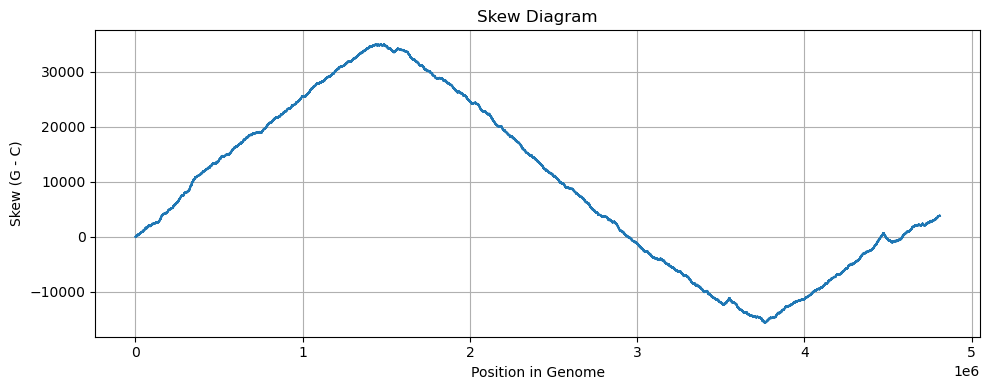

The positions in the genome at which the skew attains the minimum:
3764856
3764858


In [31]:
# Skew diagram for Salmonella enterica
min_positions = MinimumSkewProblem(salmonella_genome, skew_output_file = "salmonella_skew_values.txt")

In [32]:
k = 9
d = 1
window_start = 3764856
window_length = 500

window = salmonella_genome[window_start:window_start + window_length]

result = FrequentWordsWithMismatchesAndReverseComplements(window, k, d)
print(f"The probable DnaA box in Salmonella enterica might have the following kmers:\n{"\n".join(result)}")

The probable DnaA box in Salmonella enterica might have the following kmers:
CCCGGATCC
GGATCCGGG
CGGATCCGG
CCGGATCCG
GGATCCTGG
CCAGGATCC
